<a href="https://colab.research.google.com/github/adityerl/europe-bike-sales/blob/main/bike_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis on Europe Bike Sales

#### Introduction
The background of this dataset is not 100% clear as there is little or conflicting information on the Kaggle website. It seems the dataset contains sales data from a global retail chain for countries Australia, Canada, France, Germany, UK and US in the years 2011 to 2016 and the currency of the sale data is unknown.

#### Data Dictionary
Date = Date of the order <br>
Customer_Age = The Age of customer <br>
Customer_Gender = The customer gender <br>
Country = The country where the order was made <br>
State = The state where the order was made <br>
Product_Category = Product category for each order <br>
Sub_Category = Product sub category for each order <br>
Product = The product for each order <br>
Order_Quantity = Quantity of the product <br>
Unit_Cost = Cost of inventory holding cost <br>
Unit_Price = The price of the product

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

# reference https://stackoverflow.com/questions/21137150/format-suppress-scientific-notation-from-pandas-aggregation-results
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# load and read dataset
bike = pd.read_excel('/content/drive/MyDrive/dataset/bike_sales.xlsx')

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Customer_Age      113036 non-null  int64         
 2   Customer_Gender   113036 non-null  object        
 3   Country           113036 non-null  object        
 4   State             113036 non-null  object        
 5   Product_Category  113036 non-null  object        
 6   Sub_Category      113036 non-null  object        
 7   Product           113036 non-null  object        
 8   Order_Quantity    113036 non-null  int64         
 9   Unit_Cost         113036 non-null  int64         
 10  Unit_Price        113036 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 9.5+ MB


In [3]:
bike.head()

,Date,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price
0,2013-11-26,19,M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120
1,2015-11-26,19,M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120
2,2014-03-23,49,M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120
3,2016-03-23,49,M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120
4,2014-05-15,47,F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120


### Handle missing values

In [4]:
# sum the missing values
bike.isna().sum()

Date                0
Customer_Age        0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
dtype: int64

there's no missing values

### Handle duplicated values

In [5]:
# sum the duplicated values
bike.duplicated().sum()

1000

In [6]:
# take a closer look
bike.loc[bike.duplicated(keep=False)].head(20)

,Date,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price
1020,2013-12-19,22,M,Australia,New South Wales,Accessories,Bike Stands,All-Purpose Bike Stand,9,59,159
1021,2013-12-19,22,M,Australia,New South Wales,Accessories,Bike Stands,All-Purpose Bike Stand,9,59,159
1090,2015-09-30,42,F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,5,4,10
1091,2015-09-30,42,F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,5,4,10
1092,2013-10-24,42,F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,2,4,10
1093,2013-10-24,42,F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,2,4,10
1094,2015-10-24,42,F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,1,4,10
1095,2015-10-24,42,F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,1,4,10
1192,2016-01-15,42,M,France,Seine Saint Denis,Accessories,Bottles and Cages,Water Bottle - 30 oz.,14,2,5
1193,2016-01-15,42,M,France,Seine Saint Denis,Accessories,Bottles and Cages,Water Bottle - 30 oz.,14,2,5


In [7]:
# remove the 1000 duplicated values
bike.drop_duplicates(inplace=True)

bike.shape

(112036, 11)

### Create new columns
We will create Year, Month, Total Cost, Revenue and Profit column

#### Create Year column

In [8]:
# creating the column
bike.insert(1, 'Year', 0)

bike['Year'] = bike['Date'].dt.year

bike['Year']

0         2013
1         2015
2         2014
3         2016
4         2014
          ... 
113031    2016
113032    2014
113033    2016
113034    2014
113035    2016
Name: Year, Length: 112036, dtype: int64

#### Create Month column

In [9]:
# creating the column
bike.insert(2, 'Month', 0)

bike['Month'] = bike['Date'].dt.month

bike['Month']

0         11
1         11
2          3
3          3
4          5
          ..
113031     4
113032     4
113033     4
113034     3
113035     3
Name: Month, Length: 112036, dtype: int64

#### Create Total Cost column

In [10]:
# creating the column
bike.insert(13, 'Total_Cost', 0)

bike['Total_Cost'] = bike['Order_Quantity'] * bike['Unit_Cost']

bike['Total_Cost']

0          360
1          360
2         1035
3          900
4          180
          ... 
113031      72
113032     528
113033     528
113034     576
113035     552
Name: Total_Cost, Length: 112036, dtype: int64

#### Create Revenue column

In [11]:
# creating the column
bike.insert(14, 'Revenue', 0)

bike['Revenue'] = bike['Order_Quantity'] * bike['Unit_Price']

bike['Revenue']

0          960
1          960
2         2760
3         2400
4          480
          ... 
113031     192
113032    1408
113033    1408
113034    1536
113035    1472
Name: Revenue, Length: 112036, dtype: int64

#### Create Profit column

In [12]:
# creating the column
bike.insert(15, 'Profit', 0)

bike['Profit'] = bike['Revenue'] - bike['Total_Cost']

bike['Profit']

0          600
1          600
2         1725
3         1500
4          300
          ... 
113031     120
113032     880
113033     880
113034     960
113035     920
Name: Profit, Length: 112036, dtype: int64

#### Grouping Customer's age

In [13]:
bike['Customer_Age'].unique()

array([19, 49, 47, 35, 32, 34, 29, 51, 48, 43, 61, 57, 38, 52, 24, 23, 26,
       54, 46, 41, 33, 42, 45, 53, 21, 22, 67, 31, 37, 87, 25, 40, 44, 55,
       50, 59, 17, 27, 28, 36, 56, 58, 30, 18, 62, 39, 64, 63, 20, 60, 84,
       68, 65, 73, 69, 66, 75, 76, 78, 71, 72, 82, 86, 77, 74, 85, 81, 80,
       70, 79])

In [14]:
bike['Customer_Age'].describe()

count   112036.000
mean        35.920
std         11.017
min         17.000
25%         28.000
50%         35.000
75%         43.000
max         87.000
Name: Customer_Age, dtype: float64

Creating the column

In [15]:
bike.insert(4, 'Age_Group', 0)

# grouping the age
bike.loc[bike['Customer_Age'] <= 30, 'Age_Group'] = '17-30'
bike.loc[bike['Customer_Age'].between(31, 50), 'Age_Group'] = '31-50'
bike.loc[bike['Customer_Age'].between(51, 70), 'Age_Group'] = '51-70'
bike.loc[bike['Customer_Age'] >= 71, 'Age_Group'] = '71-87'

bike['Age_Group']

0         17-30
1         17-30
2         31-50
3         31-50
4         31-50
          ...  
113031    31-50
113032    17-30
113033    17-30
113034    31-50
113035    31-50
Name: Age_Group, Length: 112036, dtype: object

In [16]:
bike.head()

,Date,Year,Month,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Total_Cost,Revenue,Profit
0,2013-11-26,2013,11,19,17-30,M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,360,960,600
1,2015-11-26,2015,11,19,17-30,M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,360,960,600
2,2014-03-23,2014,3,49,31-50,M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1035,2760,1725
3,2016-03-23,2016,3,49,31-50,M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,900,2400,1500
4,2014-05-15,2014,5,47,31-50,F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,180,480,300


### Check the unique value

#### Categorical column

In [17]:
catCol = ['Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category'] #

for cat in catCol:
  print(bike[cat].unique(), '\n')

['M' 'F'] 

['Canada' 'Australia' 'United States' 'Germany' 'France' 'United Kingdom'] 

['British Columbia' 'New South Wales' 'Victoria' 'Oregon' 'California'
 'Saarland' 'Seine Saint Denis' 'Moselle' 'Queensland' 'England' 'Nord'
 'Washington' 'Hessen' 'Nordrhein-Westfalen' 'Hamburg' 'Loir et Cher'
 'Kentucky' 'Seine (Paris)' 'South Australia' 'Loiret' 'Alberta' 'Bayern'
 'Hauts de Seine' 'Yveline' 'Essonne' "Val d'Oise" 'Tasmania'
 'Seine et Marne' 'Val de Marne' 'Pas de Calais' 'Charente-Maritime'
 'Garonne (Haute)' 'Brandenburg' 'Texas' 'New York' 'Florida' 'Somme'
 'Illinois' 'South Carolina' 'North Carolina' 'Georgia' 'Virginia' 'Ohio'
 'Ontario' 'Wyoming' 'Missouri' 'Montana' 'Utah' 'Minnesota' 'Mississippi'
 'Massachusetts' 'Arizona' 'Alabama'] 

['Accessories' 'Clothing' 'Bikes'] 

['Bike Racks' 'Bike Stands' 'Bottles and Cages' 'Caps' 'Cleaners'
 'Fenders' 'Gloves' 'Helmets' 'Hydration Packs' 'Jerseys' 'Mountain Bikes'
 'Road Bikes' 'Shorts' 'Socks' 'Tires and Tubes' 'Tourin

In [18]:
# check total unique value for Product column
bike['Product'].nunique()

130

#### Numerical column

In [19]:
bike.describe()

,Year,Month,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Total_Cost,Revenue,Profit
count,112036.000,112036.000,112036.000,112036.000,112036.000,112036.000,112036.000,112036.000,112036.000
mean,2014.401,6.453,35.920,11.904,267.820,453.851,471.103,845.162,374.059
std,1.273,3.478,11.017,9.565,550.219,922.752,886.972,1469.638,596.461
min,2011.000,1.000,17.000,1.000,1.000,2.000,1.000,2.000,1.000
25%,2013.000,4.000,28.000,2.000,2.000,5.000,28.000,70.000,39.000
50%,2014.000,6.000,35.000,10.000,9.000,25.000,112.000,245.000,138.000
75%,2016.000,10.000,43.000,20.000,42.000,70.000,442.000,900.000,435.000
max,2016.000,12.000,87.000,32.000,2171.000,3578.000,42978.000,69136.000,26158.000


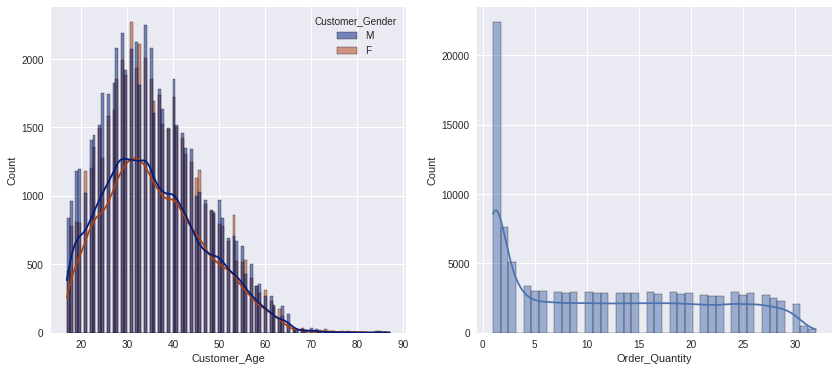

In [20]:
# age and order quantity distribution
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(
    data=bike,
    x='Customer_Age',
    hue='Customer_Gender',
    kde=True,
    palette='dark',
    ax=ax[0]
)

sns.histplot(
    data=bike,
    x='Order_Quantity',
    kde=True,
    palette='dark',
    ax=ax[1]
);

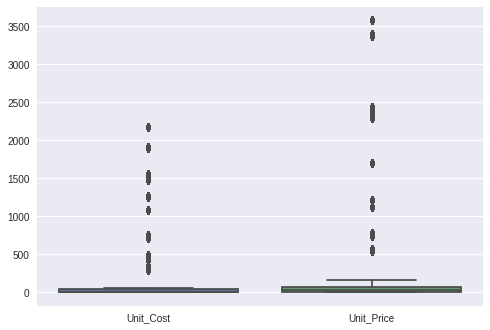

In [21]:
# unit cost and unit price distribution
numCol_0 = bike[['Unit_Cost', 'Unit_Price']].copy()

sns.boxplot(
    data=numCol_0
);

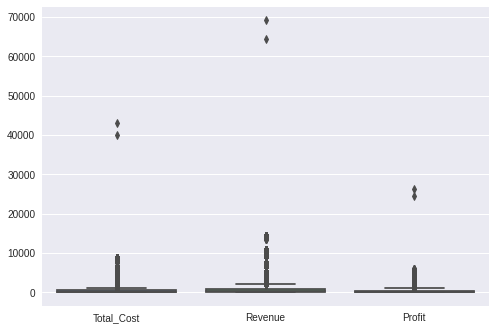

In [22]:
# total cost, revenue and profit distribution
numCol_1 = bike[['Total_Cost', 'Revenue', 'Profit']].copy()

sns.boxplot(
    data=numCol_1
);

### Bussines Question

#### Q1: *What year and month has the highest profit?*

Create the visualization for Year

In [23]:
bike['Year'].unique()

array([2013, 2015, 2014, 2016, 2012, 2011])

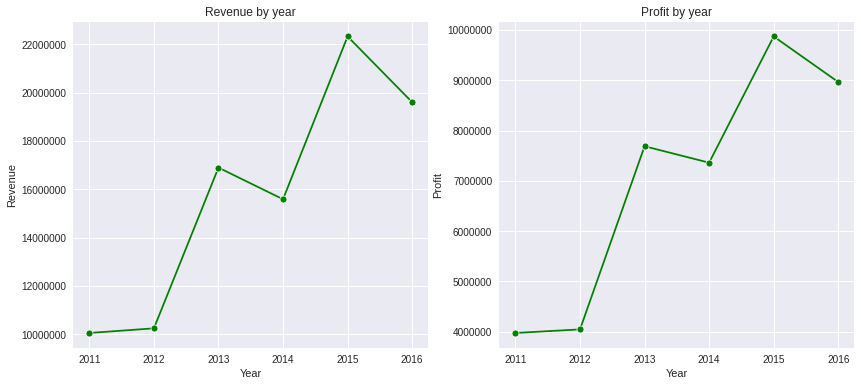

In [24]:
year = bike.groupby('Year')[['Revenue', 'Profit']].sum().reset_index()

#create the viz
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax0 = sns.lineplot(
    data=year,
    x='Year',
    y='Revenue',
    marker='o',
    color='g',
    ax=ax[0]
)

ax1 = sns.lineplot(
    data=year,
    x='Year',
    y='Profit',
    marker='o',
    color='g',
    ax=ax[1]
)

ax0.set_title('Revenue by year')
ax0.ticklabel_format(style='plain', axis='y')

ax1.set_title('Profit by year')
ax1.ticklabel_format(style='plain', axis='y');

Create the visualization for Month

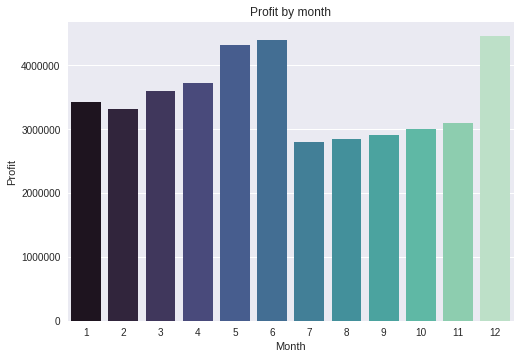

In [25]:
Month = bike.groupby('Month')['Profit'].sum().reset_index()

#create the viz
ax = sns.barplot(
    data=Month,
    x='Month',
    y='Profit',
    palette='mako'
)

ax.set_title('Profit by month')
ax.ticklabel_format(style='plain', axis='y');

Create the visualization for Product Category

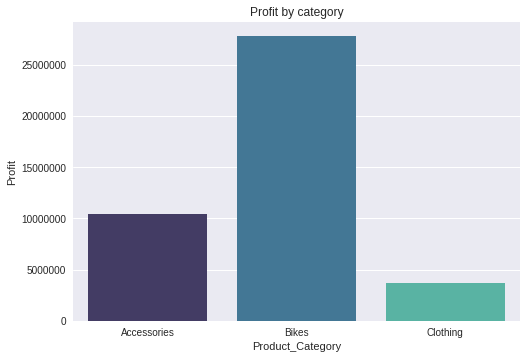

In [26]:
prod_cat = bike.groupby('Product_Category')[['Profit']].sum().reset_index()

# create the viz
ax0 = sns.barplot(
    data=prod_cat,
    x='Product_Category',
    y='Profit',
    palette='mako'
)

ax0.set_title('Profit by category')
ax0.ticklabel_format(style='plain', axis='y');

##### Conclusion

*   The total profit was 40 million USD.
*   2015 was the year with the highest sales, and the profit we made was 10 million USD.
*   June and December were the months with the highest profits, each gaining a profit of approximately 4 million USD.
*   Of the three products, bikes are the most profitable product with a profit of 27 million USD.




#### Q2: *What bikes sold the most? and who is the buyer?*

Create the visualization for Bike sales

In [27]:
bike_1 = bike[bike['Product_Category'] == 'Bikes']

bike_1['Sub_Category'].value_counts()

Road Bikes        13313
Mountain Bikes     8803
Touring Bikes      3678
Name: Sub_Category, dtype: int64

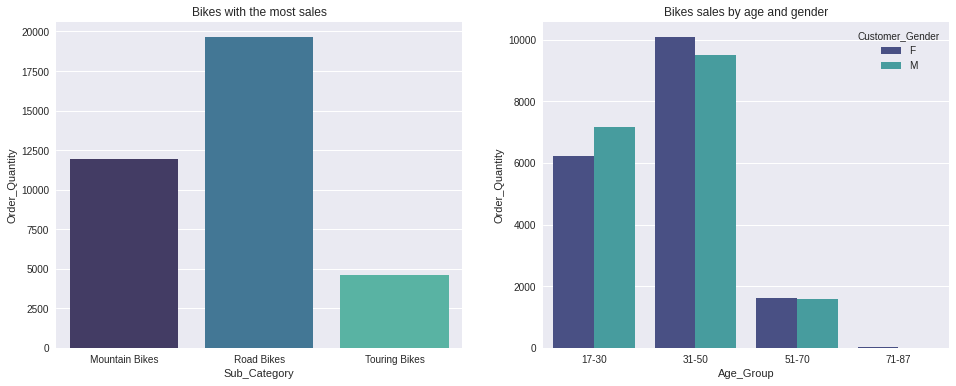

In [28]:
bike_1 = bike[bike['Product_Category'] == 'Bikes']

# grouping by sub cat
bikes_sold = bike_1.groupby('Sub_Category')['Order_Quantity'].sum().reset_index()

# grouping by age group and gender
age_group = bike_1.groupby(['Age_Group', 'Customer_Gender'])['Order_Quantity'].sum().reset_index()

# create the viz
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax0 = sns.barplot(
    data=bikes_sold,
    x='Sub_Category',
    y='Order_Quantity',
    palette='mako',
    ax=ax[0]
)

ax1 = sns.barplot(
    data=age_group,
    x='Age_Group',
    y='Order_Quantity',
    hue='Customer_Gender',
    palette='mako',
    ax=ax[1]
)

ax0.set_title('Bikes with the most sales')
ax1.set_title('Bikes sales by age and gender');

Create the visualization for Bike sales by gender

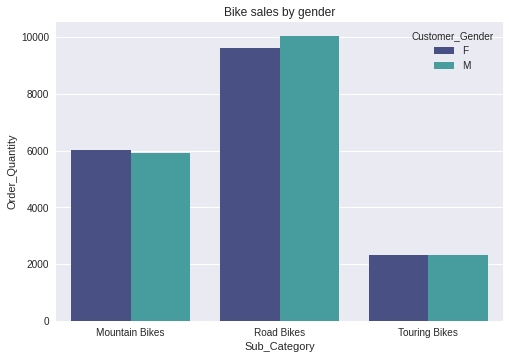

In [29]:
bike_1 = bike[bike['Product_Category'] == 'Bikes']
bikes_by_gender = bike_1.groupby(['Sub_Category', 'Customer_Gender'])['Order_Quantity'].sum().reset_index()

# create the viz
sns.barplot(
    data=bikes_by_gender,
    x='Sub_Category',
    y='Order_Quantity',
    hue='Customer_Gender',
    palette='mako'
)

plt.title('Bike sales by gender');

Create the visualization for Bike sales by age group

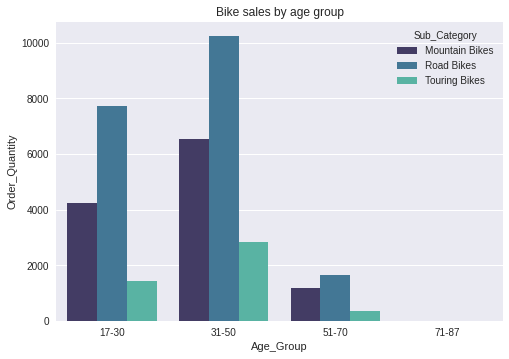

In [30]:
bike_1 = bike[bike['Product_Category'] == 'Bikes']
subcat_by_age = bike_1.groupby(['Age_Group', 'Sub_Category'])['Order_Quantity'].sum().reset_index()

# create the viz
sns.barplot(
    data=subcat_by_age,
    x='Age_Group',
    y='Order_Quantity',
    hue='Sub_Category',
    palette='mako'
)

plt.title('Bike sales by age group');

##### Conclusion

*   Total sales of all types of bikes were 36,201 units.
*   Of the three types of bikes, road bikes became the best-selling bikes with a sales quantity of 19,638 units.
*   Most bike buyers are aged 31 - 50 years, followed by ages 17 - 30 years.
*   Men are the biggest buyers of road bikes.
*   Most road bike buyers are aged 31-50 years.





#### Q3: *Which country has the highest sales?*

Create the visualization for Bike sales by country

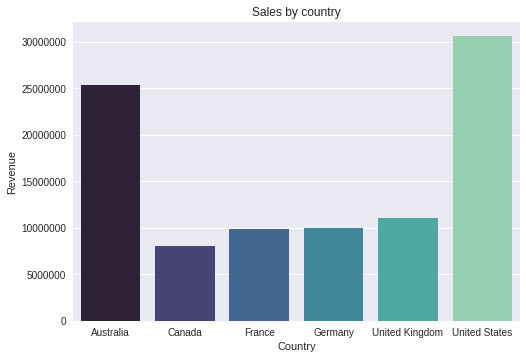

In [31]:
country = bike.groupby('Country')['Revenue'].sum().reset_index()

# create the viz
ax0 = sns.barplot(
    data=country,
    x='Country',
    y='Revenue',
    palette='mako'
)

ax0.set_title('Sales by country')
ax0.ticklabel_format(style='plain', axis='y');

Create the visualization for Bike sales by country and category

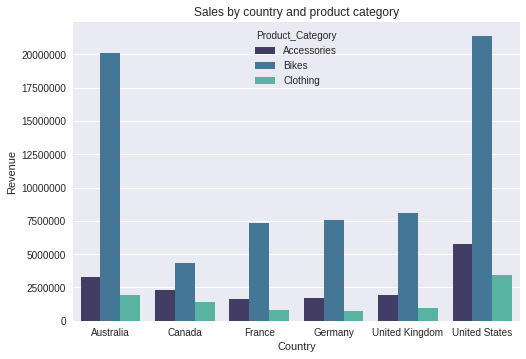

In [32]:
country_0 = bike.groupby(['Country', 'Product_Category'])['Revenue'].sum().reset_index()

# create the viz
ax0 = sns.barplot(
    data=country_0,
    x='Country',
    y='Revenue',
    hue='Product_Category',
    ci=False,
    palette='mako'
)

ax0.set_title('Sales by country and product category')
ax0.ticklabel_format(style='plain', axis='y');

Create the visualization for Bike sales by country and bike type

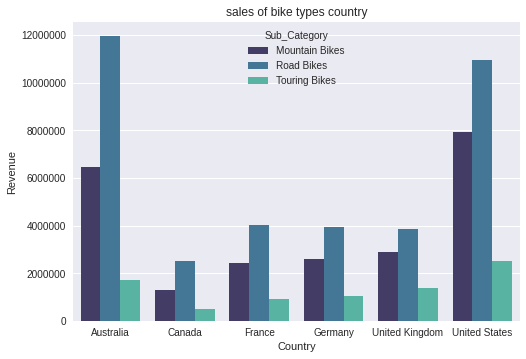

In [33]:
bike_1 = bike[bike['Product_Category'] == 'Bikes']
bikes_by_country = bike_1.groupby(['Country', 'Sub_Category'])['Revenue'].sum().reset_index()

# create the viz
ax0 = sns.barplot(
    data=bikes_by_country,
    x='Country',
    y='Revenue',
    hue='Sub_Category',
    palette='mako'
)

ax0.set_title('sales of bike types country')
ax0.ticklabel_format(style='plain', axis='y');

##### Conclusion

*   The total sales was 94 million USD.
*   America is the highest selling country with total sales of 30 million USD.
*   Of all countries, the highest sales came from bikes, followed by accessories and clothing.
*   Road bikes are the best-selling bikes in every country
